<a href="https://colab.research.google.com/github/pauarmentaa/Regresion-Lineal/blob/main/Actividad_6_1_ESP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("Datos_limpios_ESP.csv")
df.head()

<ipython-input-3-0983eb0271d3>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("Datos_limpios_ESP.csv")


,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
2,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,sin informacion,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
3,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,Roberto,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
4,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09


In [4]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

72

In [5]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [6]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19656 entries, 0 to 19655
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    19656 non-null  object 
 1   listing_url                                   19656 non-null  object 
 2   last_scraped                                  19656 non-null  object 
 3   source                                        19656 non-null  object 
 4   name                                          19656 non-null  object 
 5   description                                   19656 non-null  object 
 6   neighborhood_overview                         19656 non-null  object 
 7   picture_url                                   19656 non-null  object 
 8   host_url                                      19656 non-null  object 
 9   host_name                                     19656 non-null 

## Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”

# **Tipo de habitación 1: Private room.**

## **1.host_acceptance_rate vs host_response_rate**

In [8]:
# Filtrar los datos para obtener solo los tipos de habitación "Entire home/apt" y "Hotel room"
private_room = df[df['room_type'] == 'Private room']

In [ ]:
#Cambiar datos
private_room['host_response_rate'] = private_room['host_response_rate'].astype(str)  
private_room['host_response_rate'] = private_room['host_response_rate'].str.replace('%', '')  
private_room['host_response_rate'] = pd.to_numeric(private_room['host_response_rate'], errors='coerce')  

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

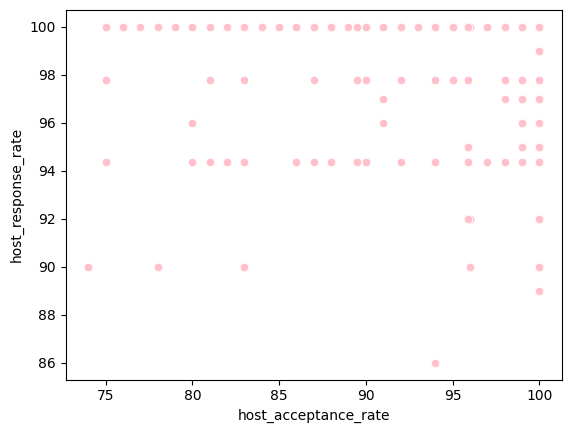

In [10]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=private_room)


In [11]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['host_response_rate']

In [12]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [13]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [14]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [15]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.04425556]),
 'rank_': 1,
 'singular_': array([201.55776332]),
 'intercept_': 93.51704533706598}

**Modelo matemático: y= 0.04425556x + 93.51704533706598**

In [16]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.008226945230747962

In [17]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([97.50004569, 97.76115349, 97.54430125, ..., 97.47874552,
       97.32302345, 97.47874552])

In [18]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones', y_pred)
private_room.head()

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97.500046,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,97.761153,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
3,97.544301,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
12,97.544301,12,https://www.airbnb.com/rooms/755927,31/03/2023,city scrape,Room Oliva - Casa Pati de lÂ´Albera,"<b>The space</b><br />Wide double room, ground...","Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/9eeac113-fa97...,https://www.airbnb.com/users/show/3680160,...,4.50,5.00,5.00,4.70,4.90,6.0,1.0,0.0,0.0,0.09
13,97.544301,13,https://www.airbnb.com/rooms/756145,31/03/2023,city scrape,Room Abeto - Casa Pati de lÂ´Albera,Inside the rural house El Pati de l'Albera is ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276036/162f...,https://www.airbnb.com/users/show/3680160,...,4.55,4.82,4.82,4.36,4.45,6.0,1.0,0.0,0.0,0.09


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

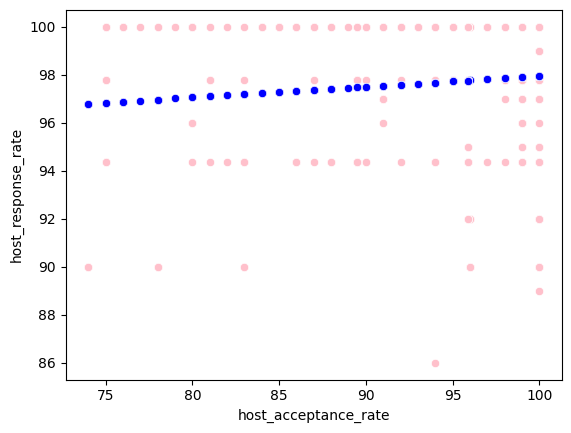

In [19]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="pink", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="blue", data=private_room)

In [20]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.008226945230747962
Coeficiente de correlación:  0.09070250950634146


## **2.host_acceptance_rate vs price**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

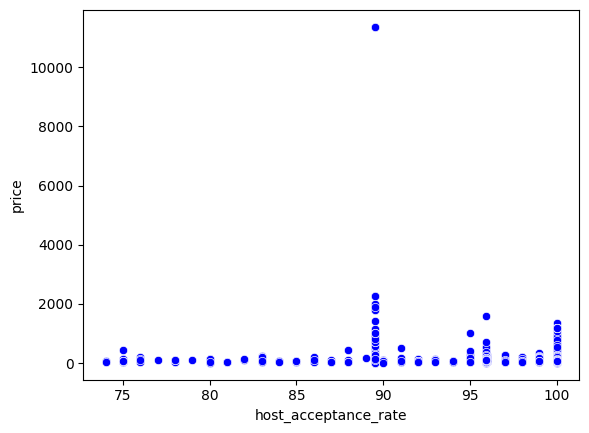

In [21]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price',color="blue",data=private_room)

In [22]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['price']

In [23]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [24]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [25]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [26]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-5.60781016]),
 'rank_': 1,
 'singular_': array([201.55776332]),
 'intercept_': 710.206370422404}

**Modelo matemático: y= -5.60781016x + 710.206370422404**

In [27]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.003874538657998139

In [28]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([205.50345562, 172.41737565, 199.89564546, ..., 208.20249083,
       227.93469628, 208.20249083])

In [29]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones2', y_pred)
private_room.head()

,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,205.503456,97.500046,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,172.417376,97.761153,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
3,199.895645,97.544301,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
12,199.895645,97.544301,12,https://www.airbnb.com/rooms/755927,31/03/2023,city scrape,Room Oliva - Casa Pati de lÂ´Albera,"<b>The space</b><br />Wide double room, ground...","Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/9eeac113-fa97...,...,4.50,5.00,5.00,4.70,4.90,6.0,1.0,0.0,0.0,0.09
13,199.895645,97.544301,13,https://www.airbnb.com/rooms/756145,31/03/2023,city scrape,Room Abeto - Casa Pati de lÂ´Albera,Inside the rural house El Pati de l'Albera is ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276036/162f...,...,4.55,4.82,4.82,4.36,4.45,6.0,1.0,0.0,0.0,0.09


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

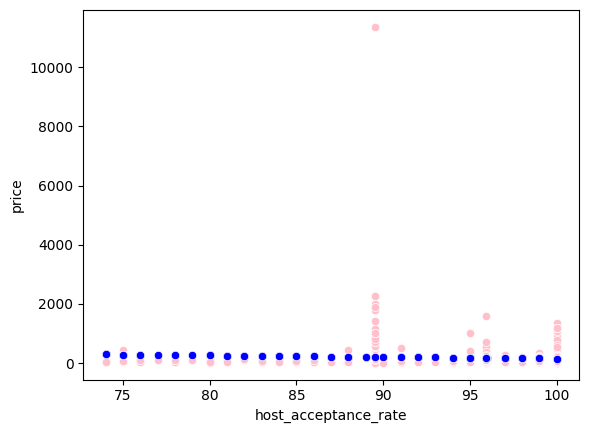

In [30]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='price', color="pink", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="blue", data=private_room)

In [31]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.003874538657998139
Coeficiente de correlación:  0.062245792291512676


## **3. host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

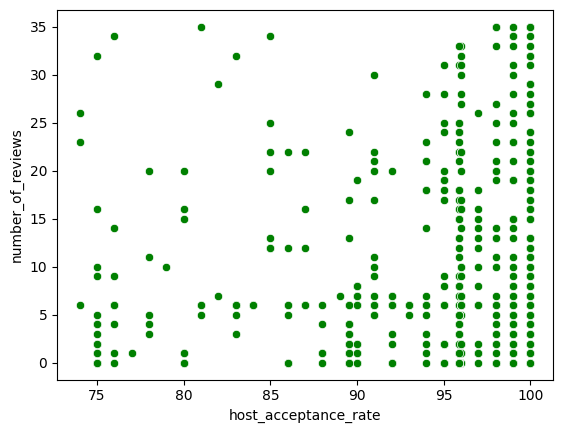

In [32]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews',color="green",data=private_room)

In [33]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_acceptance_rate']]
Var_Dep= private_room['number_of_reviews']

In [34]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [35]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [36]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [37]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00415823]),
 'rank_': 1,
 'singular_': array([201.55776332]),
 'intercept_': 6.1305780579513645}

**Modelo matemático: y= -0.00415823x + 6.1305780579513645**

In [38]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

9.461407302513436e-06

In [39]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_acceptance_rate']])
y_pred

array([5.75633773, 5.73180419, 5.7521795 , ..., 5.75833908, 5.77297063,
       5.75833908])

In [40]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones3', y_pred)
private_room.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5.756338,205.503456,97.500046,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,5.731804,172.417376,97.761153,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
3,5.752179,199.895645,97.544301,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
12,5.752179,199.895645,97.544301,12,https://www.airbnb.com/rooms/755927,31/03/2023,city scrape,Room Oliva - Casa Pati de lÂ´Albera,"<b>The space</b><br />Wide double room, ground...","Sant Climent is a tiny village, with a populat...",...,4.50,5.00,5.00,4.70,4.90,6.0,1.0,0.0,0.0,0.09
13,5.752179,199.895645,97.544301,13,https://www.airbnb.com/rooms/756145,31/03/2023,city scrape,Room Abeto - Casa Pati de lÂ´Albera,Inside the rural house El Pati de l'Albera is ...,"Sant Climent is a tiny village, with a populat...",...,4.55,4.82,4.82,4.36,4.45,6.0,1.0,0.0,0.0,0.09


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

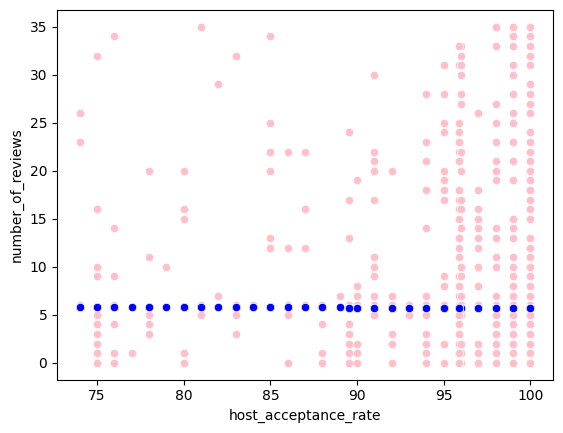

In [41]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="pink", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="blue", data=private_room)

In [42]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  9.461407302513436e-06
Coeficiente de correlación:  0.003075940068095189


## **4. review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

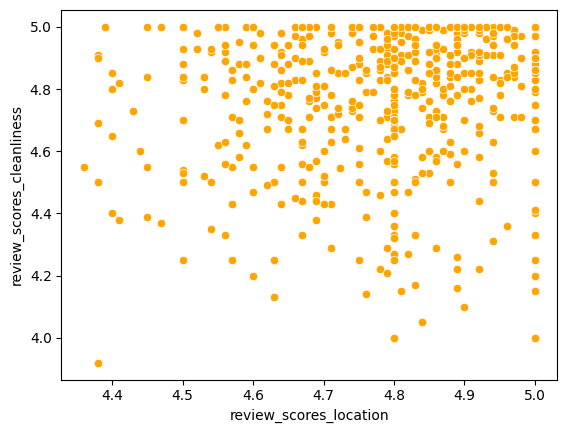

In [43]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness',color="orange", data=private_room)

In [44]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['review_scores_location']]
Var_Dep= private_room['review_scores_cleanliness']

In [45]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [46]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [47]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [48]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.58944203]),
 'rank_': 1,
 'singular_': array([4.85899126]),
 'intercept_': 1.8828772006906642}

**Modelo matemático: y= 0.58944203x + 1.8828772006906642**

In [49]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.11834498325050902

In [50]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['review_scores_location']])
y_pred

array([4.61199379, 4.64736031, 4.61199379, ..., 4.6666998 , 4.6666998 ,
       4.6666998 ])

In [51]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones4', y_pred)
private_room.head()

,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4.611994,5.756338,205.503456,97.500046,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,4.647360,5.731804,172.417376,97.761153,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
3,4.611994,5.752179,199.895645,97.544301,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
12,4.653255,5.752179,199.895645,97.544301,12,https://www.airbnb.com/rooms/755927,31/03/2023,city scrape,Room Oliva - Casa Pati de lÂ´Albera,"<b>The space</b><br />Wide double room, ground...",...,4.50,5.00,5.00,4.70,4.90,6.0,1.0,0.0,0.0,0.09
13,4.452844,5.752179,199.895645,97.544301,13,https://www.airbnb.com/rooms/756145,31/03/2023,city scrape,Room Abeto - Casa Pati de lÂ´Albera,Inside the rural house El Pati de l'Albera is ...,...,4.55,4.82,4.82,4.36,4.45,6.0,1.0,0.0,0.0,0.09


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

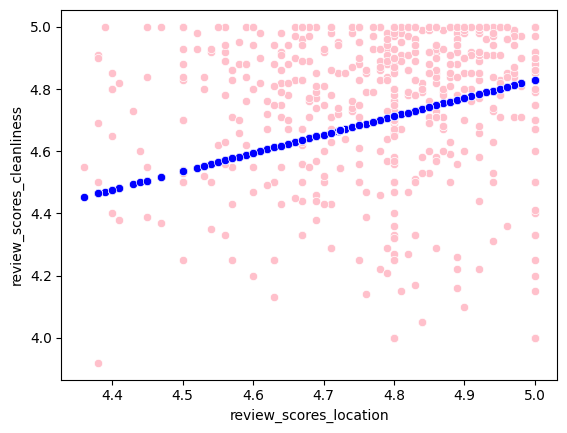

In [52]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="pink", data=private_room)
sns.scatterplot(x='review_scores_location', y='Predicciones4', color="blue", data=private_room)

In [53]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.11834498325050902
Coeficiente de correlación:  0.34401305680236766


## **5. availability_365 vs number_of_reviews**

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

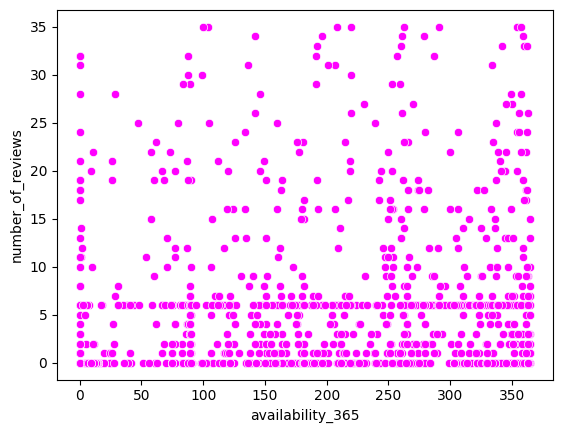

In [54]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews',color="magenta",data=private_room)

In [55]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['availability_365']]
Var_Dep= private_room['number_of_reviews']

In [56]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [57]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [58]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [59]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([9.24569564e-05]),
 'rank_': 1,
 'singular_': array([4208.79211847]),
 'intercept_': 5.712725104217374}

**Modelo matematico : y=9.24569564e-05x + 5.712725104217374**

In [60]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

2.039551394550365e-06

In [61]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['availability_365']])
y_pred

array([5.73981499, 5.73879797, 5.73565443, ..., 5.71355722, 5.71790269,
       5.74628698])

In [62]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones5', y_pred)
private_room.head()

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5.739815,4.611994,5.756338,205.503456,97.500046,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,5.738798,4.647360,5.731804,172.417376,97.761153,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
3,5.735654,4.611994,5.752179,199.895645,97.544301,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
12,5.735562,4.653255,5.752179,199.895645,97.544301,12,https://www.airbnb.com/rooms/755927,31/03/2023,city scrape,Room Oliva - Casa Pati de lÂ´Albera,...,4.50,5.00,5.00,4.70,4.90,6.0,1.0,0.0,0.0,0.09
13,5.735562,4.452844,5.752179,199.895645,97.544301,13,https://www.airbnb.com/rooms/756145,31/03/2023,city scrape,Room Abeto - Casa Pati de lÂ´Albera,...,4.55,4.82,4.82,4.36,4.45,6.0,1.0,0.0,0.0,0.09


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

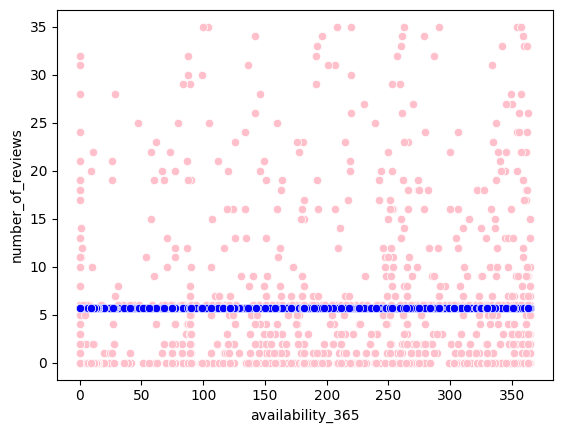

In [63]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='number_of_reviews', color="pink", data=private_room)
sns.scatterplot(x='availability_365', y='Predicciones5', color="blue", data=private_room)

In [64]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  2.039551394550365e-06
Coeficiente de correlación:  0.0014281286337548048


## **6. reviews_per_month vs review_scores_communication**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

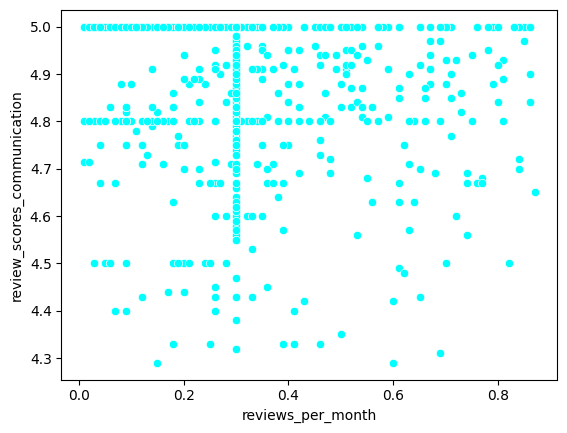

In [65]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication',color="cyan",data=private_room)

In [66]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['reviews_per_month']]
Var_Dep= private_room['review_scores_communication']

In [67]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [68]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [69]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [70]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.05414211]),
 'rank_': 1,
 'singular_': array([5.51960633]),
 'intercept_': 4.834059154837687}

**Modelo matematico: y = -0.05414211x + 4.834059154837687**

In [71]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0033984691238236886

In [72]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['reviews_per_month']])
y_pred

array([4.81402657, 4.80644668, 4.82972779, ..., 4.81998221, 4.81998221,
       4.81998221])

In [73]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones6', y_pred)
private_room.head()

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4.814027,5.739815,4.611994,5.756338,205.503456,97.500046,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,4.806447,5.738798,4.647360,5.731804,172.417376,97.761153,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
3,4.829728,5.735654,4.611994,5.752179,199.895645,97.544301,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
12,4.829186,5.735562,4.653255,5.752179,199.895645,97.544301,12,https://www.airbnb.com/rooms/755927,31/03/2023,city scrape,...,4.50,5.00,5.00,4.70,4.90,6.0,1.0,0.0,0.0,0.09
13,4.829186,5.735562,4.452844,5.752179,199.895645,97.544301,13,https://www.airbnb.com/rooms/756145,31/03/2023,city scrape,...,4.55,4.82,4.82,4.36,4.45,6.0,1.0,0.0,0.0,0.09


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

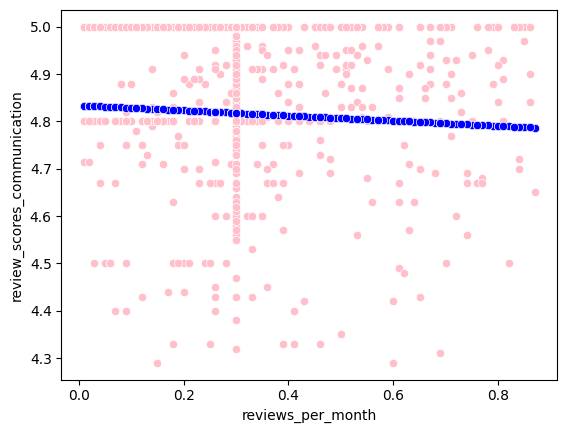

In [74]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="pink", data=private_room)
sns.scatterplot(x='reviews_per_month', y='Predicciones6', color="blue", data=private_room)

In [75]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0033984691238236886
Coeficiente de correlación:  0.05829639031555632


In [76]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(private_room)

In [77]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=private_room.corr()
Corr_Factors

<ipython-input-77-5346aab0bab6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors=private_room.corr()


,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,bathrooms_text,price,id,scrape_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones6,1.000000,-0.001482,0.140195,-0.032908,-0.032908,0.032908,-0.023039,0.050316,-0.002739,NaN,...,-0.048512,0.047907,0.058296,0.140195,-0.041938,0.044230,0.033949,NaN,NaN,-1.000000
Predicciones5,-0.001482,1.000000,-0.032885,0.021606,0.021606,-0.021606,0.049877,-0.109800,0.084356,NaN,...,-0.009436,-0.034863,-0.026985,-0.032885,-0.040624,-0.077961,-0.140741,NaN,NaN,0.001482
Predicciones4,0.140195,-0.032885,1.000000,-0.045728,-0.045728,0.045728,0.030547,-0.055413,-0.085025,NaN,...,0.344013,0.469058,0.459730,1.000000,0.415755,-0.081940,-0.023369,NaN,NaN,-0.140195
Predicciones3,-0.032908,0.021606,-0.045728,1.000000,1.000000,-1.000000,0.022238,0.062246,-0.013198,NaN,...,-0.079733,-0.076038,-0.077119,-0.045728,-0.059808,-0.173826,-0.082213,NaN,NaN,0.032908
Predicciones2,-0.032908,0.021606,-0.045728,1.000000,1.000000,-1.000000,0.022238,0.062246,-0.013198,NaN,...,-0.079733,-0.076038,-0.077119,-0.045728,-0.059808,-0.173826,-0.082213,NaN,NaN,0.032908
Predicciones,0.032908,-0.021606,0.045728,-1.000000,-1.000000,1.000000,-0.022238,-0.062246,0.013198,NaN,...,0.079733,0.076038,0.077119,0.045728,0.059808,0.173826,0.082213,NaN,NaN,-0.032908
bathrooms_text,-0.023039,0.049877,0.030547,0.022238,0.022238,-0.022238,1.000000,0.052338,-0.041010,NaN,...,0.001131,0.022028,0.017554,0.030547,0.025359,-0.050110,-0.027598,NaN,NaN,0.023039
price,0.050316,-0.109800,-0.055413,0.062246,0.062246,-0.062246,0.052338,1.000000,0.170255,NaN,...,-0.096467,-0.107657,-0.105336,-0.055413,-0.104273,-0.014936,-0.021579,NaN,NaN,-0.050316
id,-0.002739,0.084356,-0.085025,-0.013198,-0.013198,0.013198,-0.041010,0.170255,1.000000,NaN,...,-0.223671,-0.233604,-0.223443,-0.085025,-0.201613,0.106465,-0.055146,NaN,NaN,0.002739
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,bathrooms_text,price,id,scrape_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones6,1.000000,0.001482,0.140195,0.032908,0.032908,0.032908,0.023039,0.050316,0.002739,NaN,...,0.048512,0.047907,0.058296,0.140195,0.041938,0.044230,0.033949,NaN,NaN,1.000000
Predicciones5,0.001482,1.000000,0.032885,0.021606,0.021606,0.021606,0.049877,0.109800,0.084356,NaN,...,0.009436,0.034863,0.026985,0.032885,0.040624,0.077961,0.140741,NaN,NaN,0.001482
Predicciones4,0.140195,0.032885,1.000000,0.045728,0.045728,0.045728,0.030547,0.055413,0.085025,NaN,...,0.344013,0.469058,0.459730,1.000000,0.415755,0.081940,0.023369,NaN,NaN,0.140195
Predicciones3,0.032908,0.021606,0.045728,1.000000,1.000000,1.000000,0.022238,0.062246,0.013198,NaN,...,0.079733,0.076038,0.077119,0.045728,0.059808,0.173826,0.082213,NaN,NaN,0.032908
Predicciones2,0.032908,0.021606,0.045728,1.000000,1.000000,1.000000,0.022238,0.062246,0.013198,NaN,...,0.079733,0.076038,0.077119,0.045728,0.059808,0.173826,0.082213,NaN,NaN,0.032908
Predicciones,0.032908,0.021606,0.045728,1.000000,1.000000,1.000000,0.022238,0.062246,0.013198,NaN,...,0.079733,0.076038,0.077119,0.045728,0.059808,0.173826,0.082213,NaN,NaN,0.032908
bathrooms_text,0.023039,0.049877,0.030547,0.022238,0.022238,0.022238,1.000000,0.052338,0.041010,NaN,...,0.001131,0.022028,0.017554,0.030547,0.025359,0.050110,0.027598,NaN,NaN,0.023039
price,0.050316,0.109800,0.055413,0.062246,0.062246,0.062246,0.052338,1.000000,0.170255,NaN,...,0.096467,0.107657,0.105336,0.055413,0.104273,0.014936,0.021579,NaN,NaN,0.050316
id,0.002739,0.084356,0.085025,0.013198,0.013198,0.013198,0.041010,0.170255,1.000000,NaN,...,0.223671,0.233604,0.223443,0.085025,0.201613,0.106465,0.055146,NaN,NaN,0.002739
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

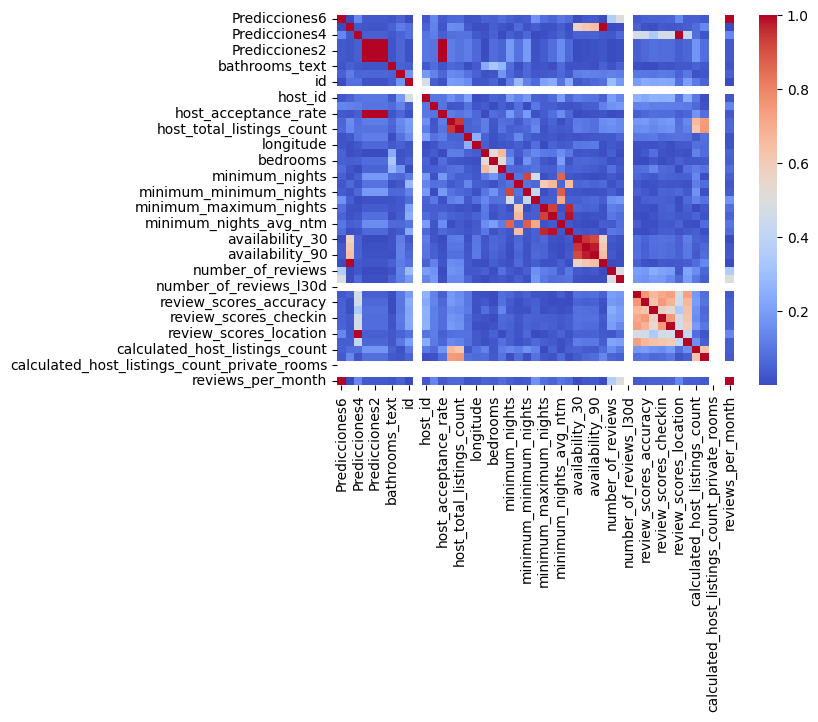

In [79]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')  
Heat_Map

<Axes: >

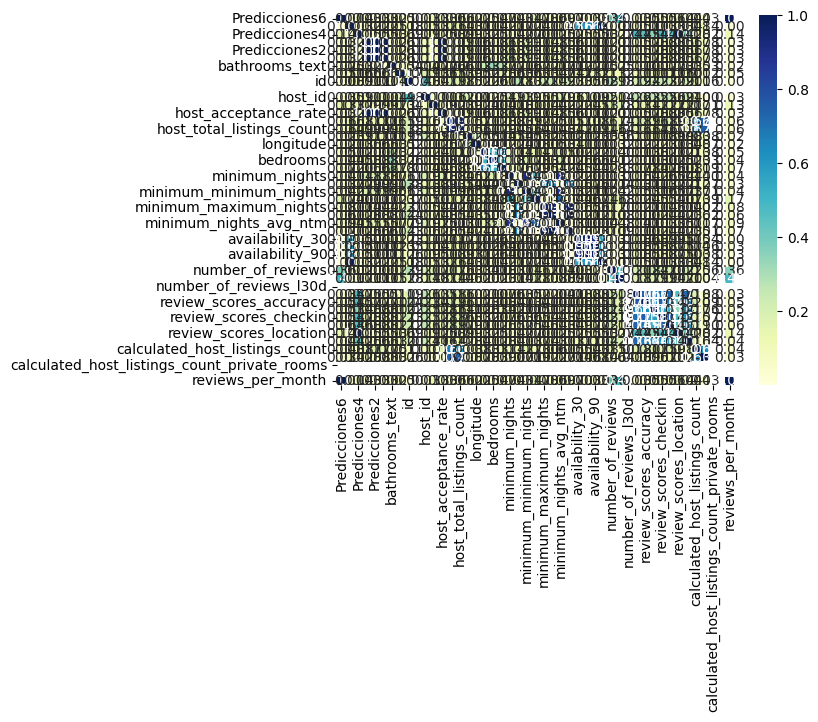

In [80]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

# **Tipo de habitación 2: Entire home/apt.**

In [81]:
df= pd.read_csv("Datos_limpios_ESP.csv")
df.head()

<ipython-input-81-0983eb0271d3>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("Datos_limpios_ESP.csv")


,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/14551,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,https://www.airbnb.com/users/show/57237,Mun,...,4.94,4.89,4.91,4.63,4.74,1.0,0.0,0.0,0.0,0.37
1,1,https://www.airbnb.com/rooms/1205757,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,https://www.airbnb.com/users/show/6586355,Montse,...,4.85,4.85,4.91,4.69,4.80,1.0,0.0,0.0,0.0,0.51
2,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,sin informacion,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,Myriam,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
3,3,https://www.airbnb.com/rooms/751638,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,https://www.airbnb.com/users/show/3680160,Roberto,...,4.50,4.86,5.00,4.63,4.50,6.0,1.0,0.0,0.0,0.08
4,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,Marisa,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09


In [82]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

72

In [83]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [84]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

# **1.host_acceptance_rate vs host_response_rate**

In [85]:
enthome_apt = df[df['room_type'] == 'Entire home/apt']

In [ ]:
#Cambiar datos
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].astype(str)  
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].str.replace('%', '')  
enthome_apt['host_response_rate'] = pd.to_numeric(enthome_apt['host_response_rate'], errors='coerce') 

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

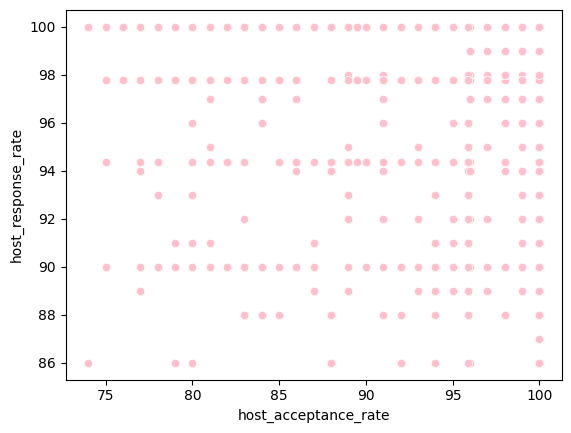

In [87]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=enthome_apt)

In [88]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_acceptance_rate']]
Var_Dep= enthome_apt['host_response_rate']

In [89]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [90]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [91]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [92]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.03001615]),
 'rank_': 1,
 'singular_': array([767.05519853]),
 'intercept_': 94.92960335633313}

**Modelo matemático: y= 0.03001615x + 94.92960335633313**

In [93]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0027834304886042993

In [94]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_acceptance_rate']])
y_pred

array([97.3308951 , 97.80815184, 97.93121804, ..., 97.80815184,
       97.90120189, 97.80815184])

In [95]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones', y_pred)
enthome_apt.head()

,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,97.330895,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,sin informacion,https://a0.muscache.com/pictures/18245529/0886...,https://www.airbnb.com/users/show/6620645,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
4,97.808152,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,https://www.airbnb.com/users/show/180072,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
5,97.931218,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ãtico loft del s.XVIII,"MagnÃ­fica casa de pueblo del siglo XVIII, ubi...",Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,https://www.airbnb.com/users/show/3387407,...,4.69,4.69,4.45,4.79,4.59,12.0,12.0,0.0,0.0,0.34
6,97.931218,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,MagnÃ­fico Apartamento de 62mÂ² con 2 dormitor...,Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/303024e1-2deb...,https://www.airbnb.com/users/show/3387407,...,4.79,4.43,4.50,4.50,4.36,12.0,12.0,0.0,0.0,0.13
7,97.616610,7,https://www.airbnb.com/rooms/1215790,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE","Big apartment with terrace (7 people), next to...",sin informacion,https://a0.muscache.com/pictures/ea54a005-62f2...,https://www.airbnb.com/users/show/3149645,...,4.78,4.89,5.00,4.56,4.11,1.0,1.0,0.0,0.0,0.08


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

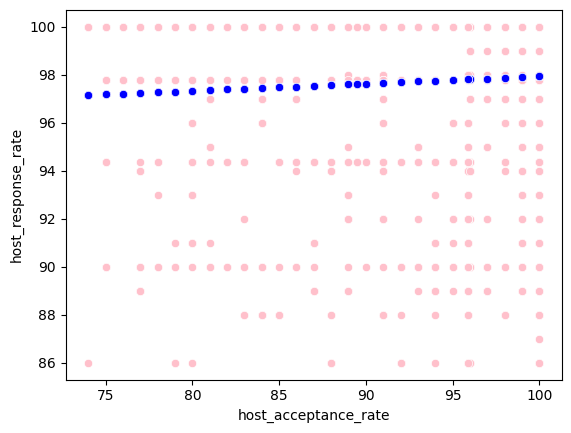

In [96]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="blue", data=enthome_apt)

In [97]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0027834304886042993
Coeficiente de correlación:  0.05275822673862626


#**2. host_acceptance_rate vs price**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

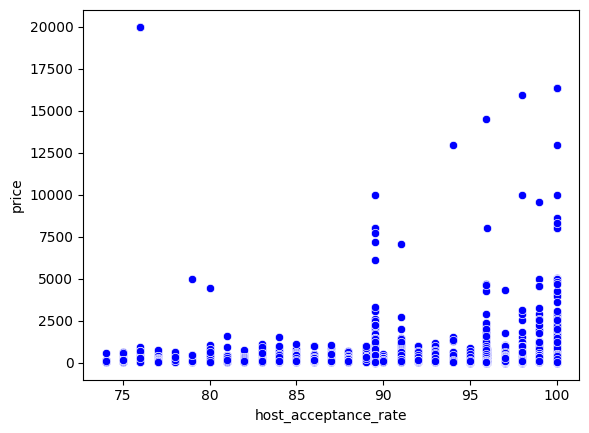

In [98]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price',color="blue",data=enthome_apt)

In [99]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_acceptance_rate']]
Var_Dep= enthome_apt['price']

In [100]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [101]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [102]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [103]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.43612005]),
 'rank_': 1,
 'singular_': array([767.05519853]),
 'intercept_': 459.34511421329023}

**Modelo matemático: y= -2.43612005x + 459.34511421329023**

In [104]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0006459234632493205

In [105]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_acceptance_rate']])
y_pred

array([264.45551036, 225.72120159, 215.7331094 , ..., 225.72120159,
       218.16922944, 225.72120159])

In [106]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones2', y_pred)
enthome_apt.head()

,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,264.455510,97.330895,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,sin informacion,https://a0.muscache.com/pictures/18245529/0886...,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
4,225.721202,97.808152,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
5,215.733109,97.931218,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ãtico loft del s.XVIII,"MagnÃ­fica casa de pueblo del siglo XVIII, ubi...",Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,...,4.69,4.69,4.45,4.79,4.59,12.0,12.0,0.0,0.0,0.34
6,215.733109,97.931218,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,MagnÃ­fico Apartamento de 62mÂ² con 2 dormitor...,Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/303024e1-2deb...,...,4.79,4.43,4.50,4.50,4.36,12.0,12.0,0.0,0.0,0.13
7,241.266813,97.616610,7,https://www.airbnb.com/rooms/1215790,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE","Big apartment with terrace (7 people), next to...",sin informacion,https://a0.muscache.com/pictures/ea54a005-62f2...,...,4.78,4.89,5.00,4.56,4.11,1.0,1.0,0.0,0.0,0.08


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

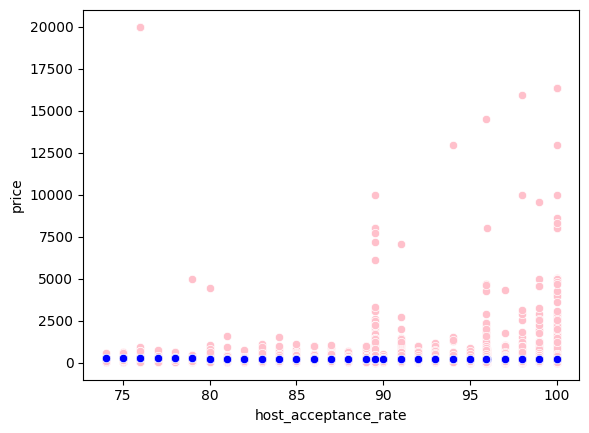

In [107]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="blue", data=enthome_apt)

In [108]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0006459234632493205
Coeficiente de correlación:  0.02541502436058877


# **3. host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

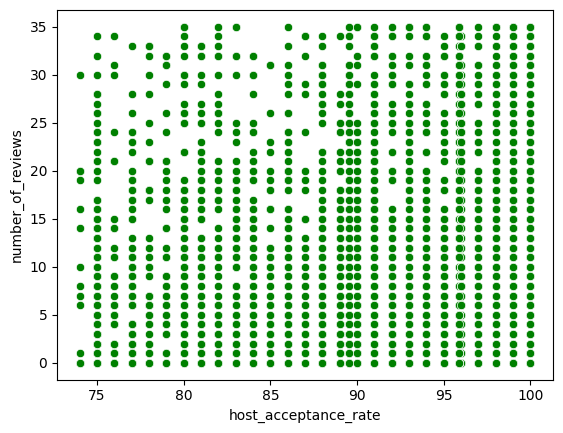

In [109]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews',color="green",data=enthome_apt)

In [110]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_acceptance_rate']]
Var_Dep= enthome_apt['number_of_reviews']

In [111]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [112]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [113]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [114]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.0380328]),
 'rank_': 1,
 'singular_': array([767.05519853]),
 'intercept_': 9.617966231293025}

**Modelo matemático: y= -0.0380328x + 9.617966231293025**

In [115]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0008107891720193772

In [116]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_acceptance_rate']])
y_pred

array([6.57534246, 5.97062098, 5.81468651, ..., 5.97062098, 5.85271931,
       5.97062098])

In [117]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones3', y_pred)
enthome_apt.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,6.575342,264.455510,97.330895,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,sin informacion,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
4,5.970621,225.721202,97.808152,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
5,5.814687,215.733109,97.931218,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ãtico loft del s.XVIII,"MagnÃ­fica casa de pueblo del siglo XVIII, ubi...",Palafrugell se remonta al siglo X. El nÃºcleo ...,...,4.69,4.69,4.45,4.79,4.59,12.0,12.0,0.0,0.0,0.34
6,5.814687,215.733109,97.931218,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,MagnÃ­fico Apartamento de 62mÂ² con 2 dormitor...,Palafrugell se remonta al siglo X. El nÃºcleo ...,...,4.79,4.43,4.50,4.50,4.36,12.0,12.0,0.0,0.0,0.13
7,6.213320,241.266813,97.616610,7,https://www.airbnb.com/rooms/1215790,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE","Big apartment with terrace (7 people), next to...",sin informacion,...,4.78,4.89,5.00,4.56,4.11,1.0,1.0,0.0,0.0,0.08


<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

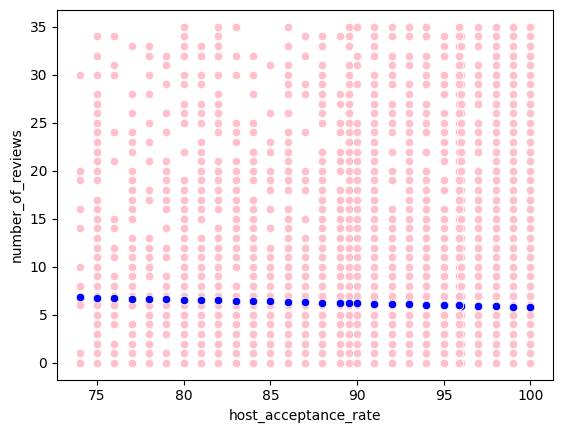

In [118]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones3', color="blue", data=enthome_apt)

In [119]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0008107891720193772
Coeficiente de correlación:  0.028474359905349536


## **4. review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

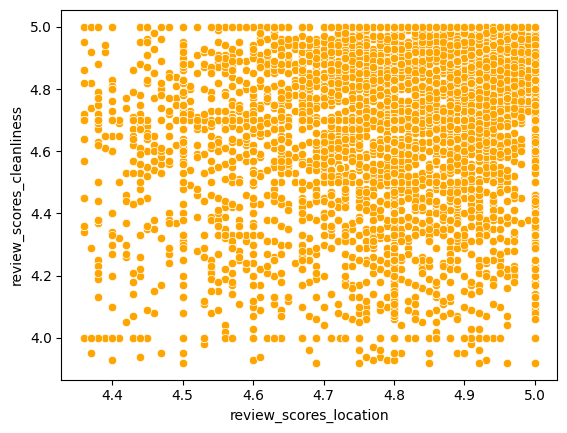

In [120]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness',color="orange", data=enthome_apt)

In [121]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['review_scores_location']]
Var_Dep= enthome_apt['review_scores_cleanliness']

In [122]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [123]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [124]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [125]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.46792109]),
 'rank_': 1,
 'singular_': array([19.90881893]),
 'intercept_': 2.401042882803257}

**Modelo matemático: y= 0.46792109x + 2.401042882803257**

In [126]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.06723304270689867

In [127]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['review_scores_location']])
y_pred

array([4.61898886, 4.69853545, 4.64238492, ..., 4.61094522, 4.61094522,
       4.61094522])

In [128]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones4', y_pred)
enthome_apt.head()

,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,description,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,4.618989,6.575342,264.455510,97.330895,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
4,4.698535,5.970621,225.721202,97.808152,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
5,4.642385,5.814687,215.733109,97.931218,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ãtico loft del s.XVIII,"MagnÃ­fica casa de pueblo del siglo XVIII, ubi...",...,4.69,4.69,4.45,4.79,4.59,12.0,12.0,0.0,0.0,0.34
6,4.506688,5.814687,215.733109,97.931218,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,MagnÃ­fico Apartamento de 62mÂ² con 2 dormitor...,...,4.79,4.43,4.50,4.50,4.36,12.0,12.0,0.0,0.0,0.13
7,4.534763,6.213320,241.266813,97.616610,7,https://www.airbnb.com/rooms/1215790,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE","Big apartment with terrace (7 people), next to...",...,4.78,4.89,5.00,4.56,4.11,1.0,1.0,0.0,0.0,0.08


<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

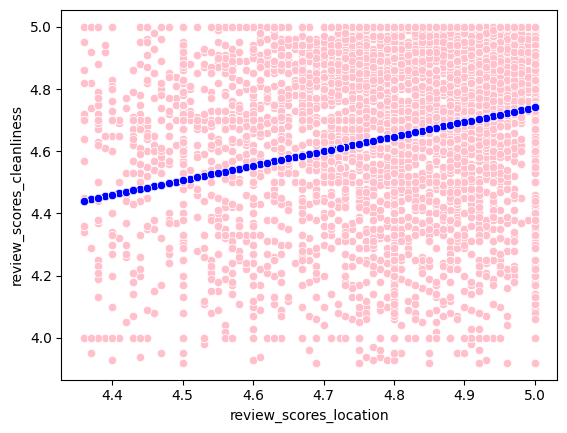

In [129]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="pink", data=enthome_apt)
sns.scatterplot(x='review_scores_location', y='Predicciones4', color="blue", data=enthome_apt)

In [130]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.06723304270689867
Coeficiente de correlación:  0.2592933526083896


## **5. availability_365 vs number_of_reviews**

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

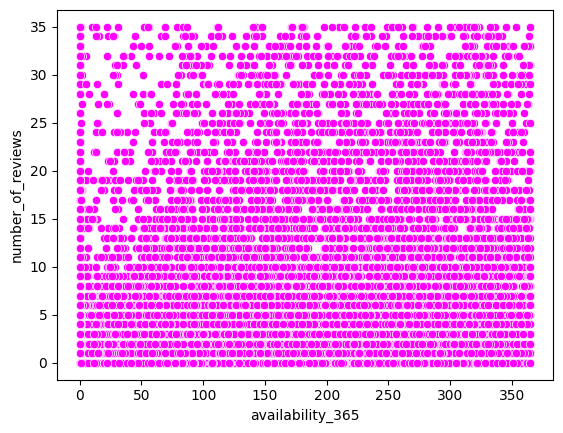

In [131]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews',color="magenta",data=enthome_apt)

In [132]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['availability_365']]
Var_Dep= enthome_apt['number_of_reviews']

In [133]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [134]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [135]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [136]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00322971]),
 'rank_': 1,
 'singular_': array([15135.427825]),
 'intercept_': 5.356191671886519}

**Modelo matematico : y=0.00322971x + 5.356191671886519**

In [137]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0022764309090844703

In [138]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['availability_365']])
y_pred

array([6.37355014, 5.35619167, 6.25405089, ..., 6.22498351, 6.23790234,
       5.65332494])

In [139]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones5', y_pred)
enthome_apt.head()

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,name,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,6.373550,4.618989,6.575342,264.455510,97.330895,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,Apartment port de rei stunning wiew,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
4,5.356192,4.698535,5.970621,225.721202,97.808152,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
5,6.254051,4.642385,5.814687,215.733109,97.931218,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,CAN FELIP - Ãtico loft del s.XVIII,...,4.69,4.69,4.45,4.79,4.59,12.0,12.0,0.0,0.0,0.34
6,6.441374,4.506688,5.814687,215.733109,97.931218,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,...,4.79,4.43,4.50,4.50,4.36,12.0,12.0,0.0,0.0,0.13
7,5.537055,4.534763,6.213320,241.266813,97.616610,7,https://www.airbnb.com/rooms/1215790,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE",...,4.78,4.89,5.00,4.56,4.11,1.0,1.0,0.0,0.0,0.08


<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

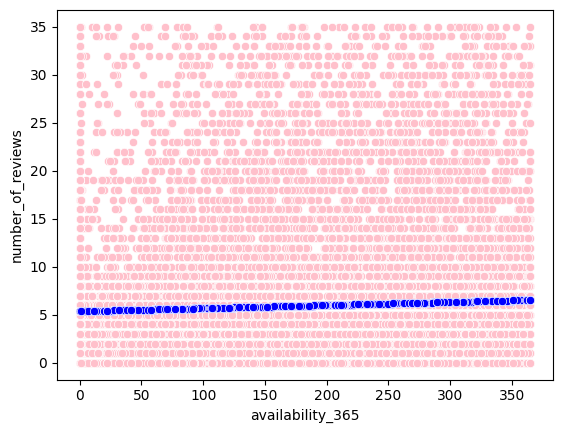

In [140]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='number_of_reviews', color="pink", data=enthome_apt)
sns.scatterplot(x='availability_365', y='Predicciones5', color="blue", data=enthome_apt)

In [141]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0022764309090844703
Coeficiente de correlación:  0.047711957715906715


## **6. reviews_per_month vs review_scores_communication**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

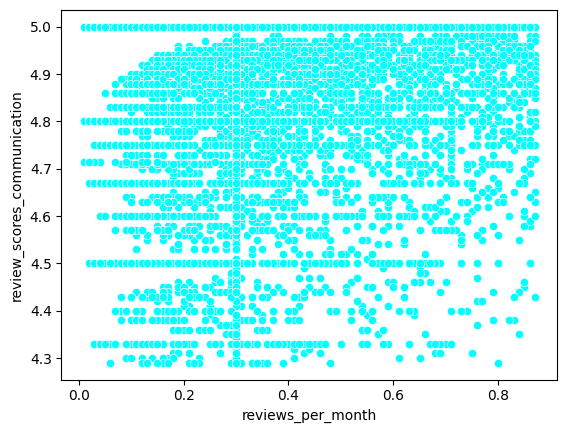

In [142]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication',color="cyan",data=enthome_apt)

In [143]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['reviews_per_month']]
Var_Dep= enthome_apt['review_scores_communication']

In [144]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [145]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [146]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [147]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00992847]),
 'rank_': 1,
 'singular_': array([22.91648384]),
 'intercept_': 4.8199877672049505}

**Modelo matematico: y = -0.00992847x + 4.8199877672049505**

In [148]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.00011115795320892907

In [149]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['reviews_per_month']])
y_pred

array([4.81383211, 4.8190942 , 4.81661209, ..., 4.81740636, 4.81740636,
       4.81740636])

In [150]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones6', y_pred)
enthome_apt.head()

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,listing_url,last_scraped,source,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,4.813832,6.373550,4.618989,6.575342,264.455510,97.330895,2,https://www.airbnb.com/rooms/1212820,01/04/2023,city scrape,...,4.31,4.81,4.76,4.74,4.32,2.0,2.0,0.0,0.0,0.62
4,4.819094,5.356192,4.698535,5.970621,225.721202,97.808152,4,https://www.airbnb.com/rooms/41342,01/04/2023,previous scrape,...,4.82,4.73,4.73,4.91,4.36,1.0,1.0,0.0,0.0,0.09
5,4.816612,6.254051,4.642385,5.814687,215.733109,97.931218,5,https://www.airbnb.com/rooms/751997,01/04/2023,city scrape,...,4.69,4.69,4.45,4.79,4.59,12.0,12.0,0.0,0.0,0.34
6,4.818697,6.441374,4.506688,5.814687,215.733109,97.931218,6,https://www.airbnb.com/rooms/752035,31/03/2023,city scrape,...,4.79,4.43,4.50,4.50,4.36,12.0,12.0,0.0,0.0,0.13
7,4.819193,5.537055,4.534763,6.213320,241.266813,97.616610,7,https://www.airbnb.com/rooms/1215790,01/04/2023,city scrape,...,4.78,4.89,5.00,4.56,4.11,1.0,1.0,0.0,0.0,0.08


<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

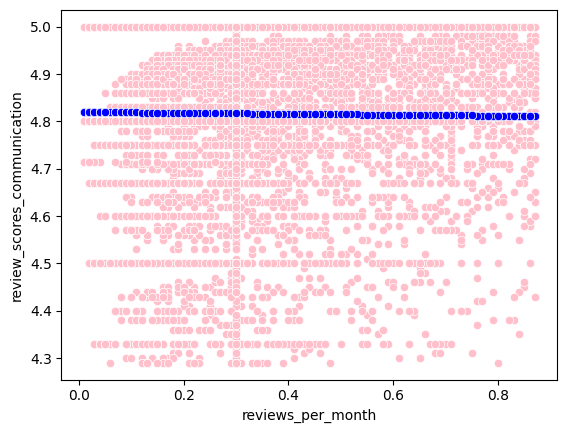

In [151]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="pink", data=enthome_apt)
sns.scatterplot(x='reviews_per_month', y='Predicciones6', color="blue", data=enthome_apt)

In [152]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.00011115795320892907
Coeficiente de correlación:  0.01054314721555803


In [153]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(enthome_apt)

In [154]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors1_1=enthome_apt.corr()
Corr_Factors1_1

<ipython-input-154-6cdc44a55d36>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors1_1=enthome_apt.corr()


,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,bathrooms_text,price,id,scrape_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones6,1.000000,-0.107399,0.072036,-0.005491,-0.005491,0.005491,0.042180,0.038451,-0.067840,NaN,...,-0.048438,0.023100,0.010543,0.072036,-0.077671,0.202903,0.199927,NaN,NaN,-1.000000
Predicciones5,-0.107399,1.000000,-0.014803,0.046168,0.046168,-0.046168,0.001625,-0.048482,0.154677,NaN,...,0.037909,0.001713,-0.009370,-0.014803,0.026057,-0.205068,-0.207088,NaN,NaN,0.107399
Predicciones4,0.072036,-0.014803,1.000000,-0.012219,-0.012219,0.012219,0.005341,-0.006312,-0.117572,NaN,...,0.259293,0.383038,0.388251,1.000000,0.324010,-0.042512,-0.046863,NaN,NaN,-0.072036
Predicciones3,-0.005491,0.046168,-0.012219,1.000000,1.000000,-1.000000,0.041360,0.025415,-0.045531,NaN,...,-0.009712,0.008821,0.006757,-0.012219,0.003814,-0.149593,-0.152780,NaN,NaN,0.005491
Predicciones2,-0.005491,0.046168,-0.012219,1.000000,1.000000,-1.000000,0.041360,0.025415,-0.045531,NaN,...,-0.009712,0.008821,0.006757,-0.012219,0.003814,-0.149593,-0.152780,NaN,NaN,0.005491
Predicciones,0.005491,-0.046168,0.012219,-1.000000,-1.000000,1.000000,-0.041360,-0.025415,0.045531,NaN,...,0.009712,-0.008821,-0.006757,0.012219,-0.003814,0.149593,0.152780,NaN,NaN,-0.005491
bathrooms_text,0.042180,0.001625,0.005341,0.041360,0.041360,-0.041360,1.000000,0.240927,-0.007403,NaN,...,0.014794,0.025507,0.018591,0.005341,0.038984,-0.002723,-0.003501,NaN,NaN,-0.042180
price,0.038451,-0.048482,-0.006312,0.025415,0.025415,-0.025415,0.240927,1.000000,0.009413,NaN,...,-0.002683,-0.005041,-0.009963,-0.006312,-0.013833,0.013048,0.011672,NaN,NaN,-0.038451
id,-0.067840,0.154677,-0.117572,-0.045531,-0.045531,0.045531,-0.007403,0.009413,1.000000,NaN,...,-0.069309,-0.135285,-0.133500,-0.117572,-0.081754,0.051302,0.079813,NaN,NaN,0.067840
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors11= abs(Corr_Factors1_1)
Corr_Factors11

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,bathrooms_text,price,id,scrape_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones6,1.000000,0.107399,0.072036,0.005491,0.005491,0.005491,0.042180,0.038451,0.067840,NaN,...,0.048438,0.023100,0.010543,0.072036,0.077671,0.202903,0.199927,NaN,NaN,1.000000
Predicciones5,0.107399,1.000000,0.014803,0.046168,0.046168,0.046168,0.001625,0.048482,0.154677,NaN,...,0.037909,0.001713,0.009370,0.014803,0.026057,0.205068,0.207088,NaN,NaN,0.107399
Predicciones4,0.072036,0.014803,1.000000,0.012219,0.012219,0.012219,0.005341,0.006312,0.117572,NaN,...,0.259293,0.383038,0.388251,1.000000,0.324010,0.042512,0.046863,NaN,NaN,0.072036
Predicciones3,0.005491,0.046168,0.012219,1.000000,1.000000,1.000000,0.041360,0.025415,0.045531,NaN,...,0.009712,0.008821,0.006757,0.012219,0.003814,0.149593,0.152780,NaN,NaN,0.005491
Predicciones2,0.005491,0.046168,0.012219,1.000000,1.000000,1.000000,0.041360,0.025415,0.045531,NaN,...,0.009712,0.008821,0.006757,0.012219,0.003814,0.149593,0.152780,NaN,NaN,0.005491
Predicciones,0.005491,0.046168,0.012219,1.000000,1.000000,1.000000,0.041360,0.025415,0.045531,NaN,...,0.009712,0.008821,0.006757,0.012219,0.003814,0.149593,0.152780,NaN,NaN,0.005491
bathrooms_text,0.042180,0.001625,0.005341,0.041360,0.041360,0.041360,1.000000,0.240927,0.007403,NaN,...,0.014794,0.025507,0.018591,0.005341,0.038984,0.002723,0.003501,NaN,NaN,0.042180
price,0.038451,0.048482,0.006312,0.025415,0.025415,0.025415,0.240927,1.000000,0.009413,NaN,...,0.002683,0.005041,0.009963,0.006312,0.013833,0.013048,0.011672,NaN,NaN,0.038451
id,0.067840,0.154677,0.117572,0.045531,0.045531,0.045531,0.007403,0.009413,1.000000,NaN,...,0.069309,0.135285,0.133500,0.117572,0.081754,0.051302,0.079813,NaN,NaN,0.067840
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

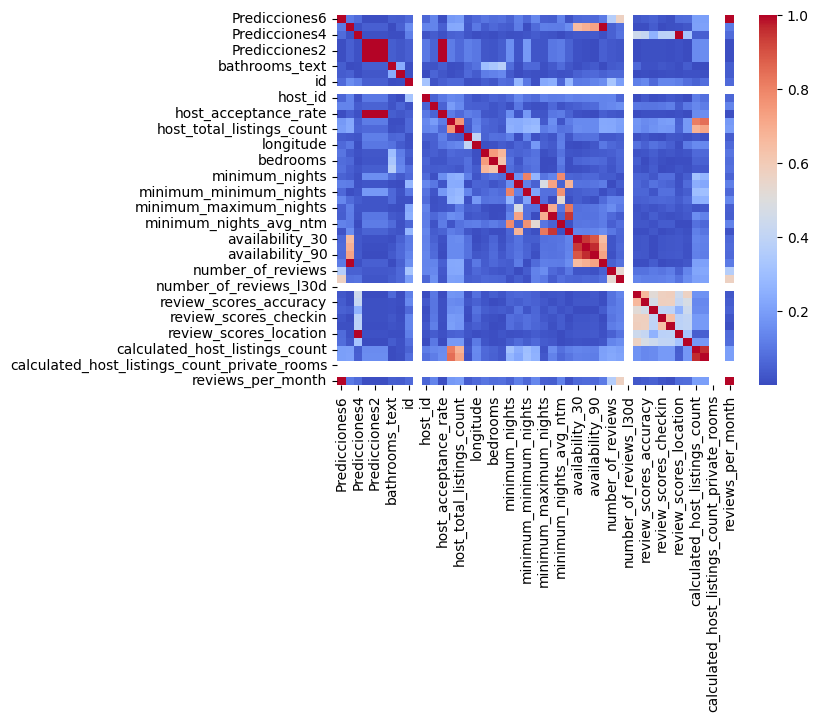

In [156]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map1= sns.heatmap(Corr_Factors11, cmap = 'coolwarm')  
Heat_Map1

<Axes: >

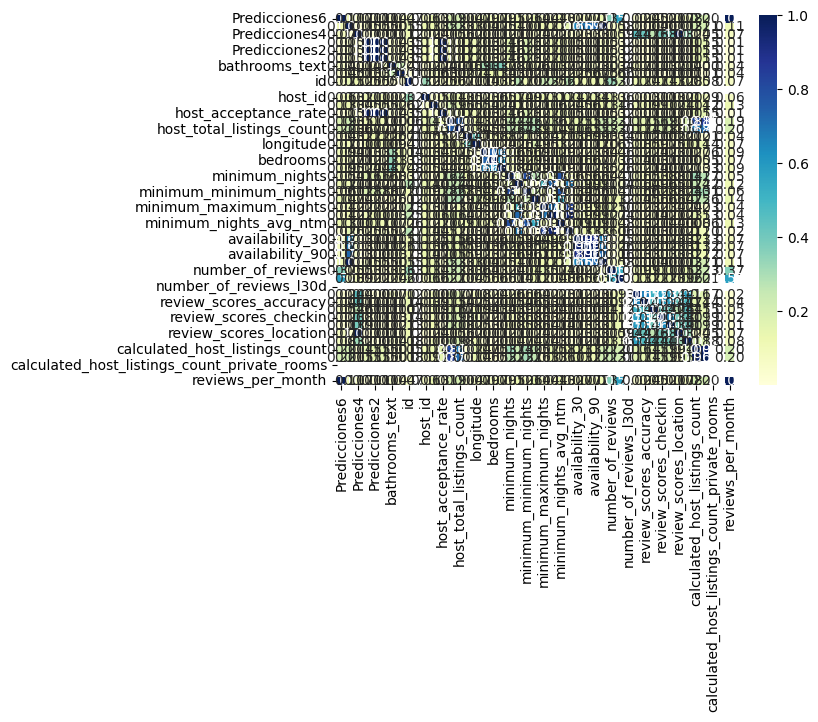

In [157]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map2= sns.heatmap(Corr_Factors11, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map2